## NEWS TITLE CLASSIFIER

### Data Preparation
At this stage we will take data from existing sources, and take a general look at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Import Dataset
dataset = pd.read_excel('News Title.xls', names = ['No', 'Title', 'Category'])

In [4]:
dataset.drop('No', axis = 1, inplace = True)

In [5]:
dataset.head(10)

,Title,Category
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business
5,Firefox Windows 8 Metro Browser Development Ca...,Technology
6,Destiny Beta Kicks Off In July,Technology
7,Apple & Google's Motorola end legal battle,Technology
8,UPDATE 2-Facebook Q1 revenue grows 72 percent ...,Business
9,"Selena Gomez, Justin Bieber Spotted at the Sam...",Entertainment


In [6]:
# Check missing value in Dataset
dataset.isnull().sum()

Title       0
Category    0
dtype: int64

Why check duplicate title in column title? 
Because i think, **News is never same** in that title

In [7]:
# Check Duplicate Title in Dataset
dataset[dataset['Title'].duplicated()]

,Title,Category
1589,Study Questions Tamiflu's Effectiveness,Medical
1922,Microsoft may release selfie-friendly Nokia 'S...,Business
2068,Latinos Wary Of All-Out Push To Sign Up For ACA,Business
3242,Harrison Ford's Ankle Injury Forces Two-Week H...,Entertainment
3604,Welcome to the new 10News.com,Medical
...,...,...
65295,Samsung tablets to have richer colors in screens,Technology
65399,"One Direction, Lawrence shine at Kids Choice A...",Entertainment
65420,Gwar frontman Dave Brockie aka Oderus Urungus ...,Entertainment
65453,Stock futures drift after jobless claims rise,Business


In [8]:
# Drop duplicate title and keep first
dataset.drop_duplicates(subset ="Title", inplace = True)

In [9]:
# Cross check duplicated data
dataset.duplicated().any()

False

In [10]:
dataset.reset_index(drop=True, inplace=True)

In [11]:
dataset['Category'].unique()

array(['Technology', 'Business', 'Entertainment', 'Medical'], dtype=object)

In [12]:
# Create new column to label data
dataset['Label'] = dataset['Category'].map({'Technology' : 1, 'Business': 2, 'Entertainment' : 3, 'Medical' : 4})

In [13]:
dataset.head(5)

,Title,Category,Label
0,Google+ rolls out 'Stories' for tricked out ph...,Technology,1
1,Dov Charney's Redeeming Quality,Business,2
2,White God adds Un Certain Regard to the Palm Dog,Entertainment,3
3,"Google shows off Androids for wearables, cars,...",Technology,1
4,China May new bank loans at 870.8 bln yuan,Business,2


### Exploratory Data Analysis (EDA)
At this stage we will carry out the following process:
1. Visualization to see outliers in Length of Title News
2. Eliminate data outliers and visualize after that process
3. Visualize the proportions of the data labels (if they are not balanced then further treatment needs to be done)
4. Create a visual wordcloud of each data Category (Technology, Business, Entertainment, Medical)

In [14]:
# Create length of text
dataset['Length'] = dataset['Title'].apply(len)

In [15]:
dataset.head(5)

,Title,Category,Label,Length
0,Google+ rolls out 'Stories' for tricked out ph...,Technology,1,58
1,Dov Charney's Redeeming Quality,Business,2,31
2,White God adds Un Certain Regard to the Palm Dog,Entertainment,3,48
3,"Google shows off Androids for wearables, cars,...",Technology,1,50
4,China May new bank loans at 870.8 bln yuan,Business,2,42


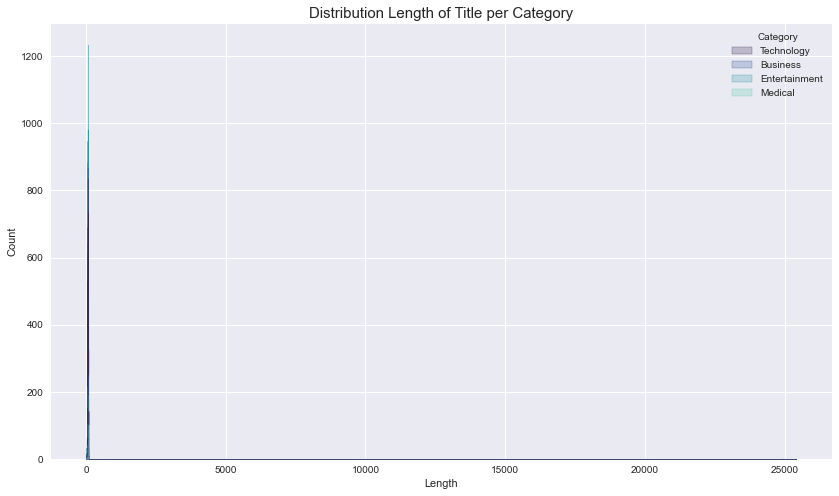

In [16]:
# Visualization Distribution Length of Title per Category
plt.figure(figsize=(14,8))
sns.histplot(dataset, x="Length", hue="Category", element="step", palette = 'mako')
plt.title('Distribution Length of Title per Category', fontsize=15)
plt.show()

From that visual, we can look data does have a outlier in length of text.

We make sure to check with boxplot

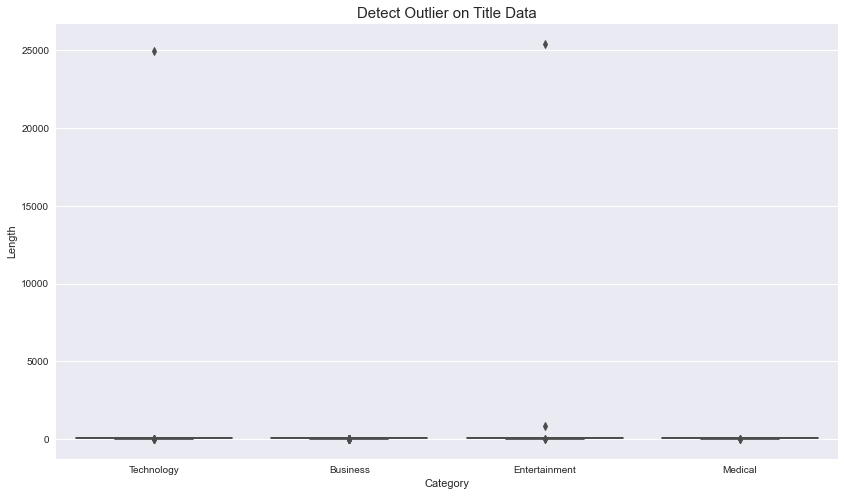

In [17]:
# Visualization Outlier of Lenght Title
plt.figure(figsize=(14,8))
sns.boxplot(dataset['Category'], dataset['Length'])
plt.title('Detect Outlier on Title Data', fontsize=15)
plt.show()

In [18]:
# Show Outlier Data with IQR
Q1 = np.percentile(dataset['Length'], 25)
Q3 = np.percentile(dataset['Length'], 75)
IQR = Q3 - Q1

# Above Upper bound
upper = (Q3+1.5*IQR)

# Below Lower bound
lower = (Q1-1.5*IQR)

# Data Outlier
dataset[(dataset['Length'] < int(lower)) | (dataset['Length'] > int(upper))]

,Title,Category,Label,Length
5395,Stork 2,Technology,1,7
6606,News,Medical,4,4
7224,Subway,Business,2,6
8132,Platinum,Entertainment,3,8
12255,Noah,Entertainment,3,4
24457,Ruby Dee,Entertainment,3,8
29020,I don't know why I'm a sex symbol' says smould...,Entertainment,3,824
48272,Sabotage,Entertainment,3,8
52791,I never thought I'd be in love” says Angelina ...,Entertainment,3,25422
54430,Bieber 3,Entertainment,3,8


In [19]:
# Just Get Data Non Outlier
dataset = dataset[(dataset['Length'] > int(lower)) & (dataset['Length'] < int(upper))]
dataset.reset_index(drop=True, inplace=True)
dataset

,Title,Category,Label,Length
0,Google+ rolls out 'Stories' for tricked out ph...,Technology,1,58
1,Dov Charney's Redeeming Quality,Business,2,31
2,White God adds Un Certain Regard to the Palm Dog,Entertainment,3,48
3,"Google shows off Androids for wearables, cars,...",Technology,1,50
4,China May new bank loans at 870.8 bln yuan,Business,2,42
...,...,...,...,...
64953,Xbox One Homebrew Will Likely Be a Reality in ...,Technology,1,71
64954,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology,1,50
64955,Watch first 'Ninja Turtles' trailer,Entertainment,3,35
64956,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment,3,74


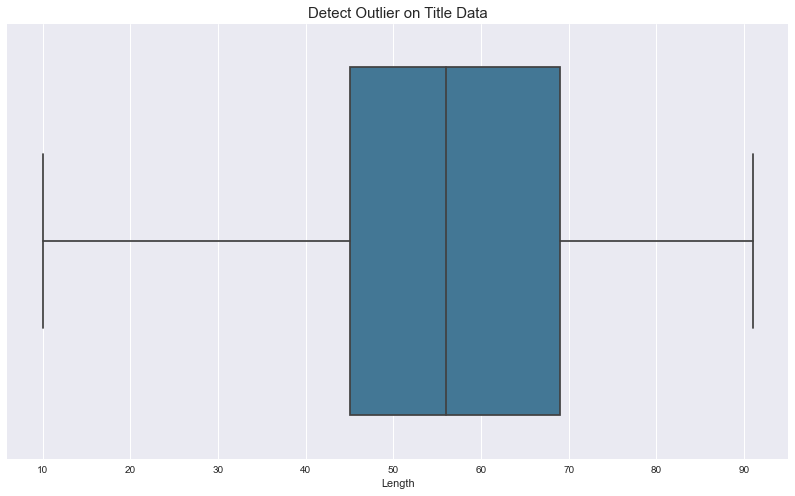

In [20]:
# Visualization Outlier of Lenght Title
plt.figure(figsize=(14,8))
sns.boxplot(dataset['Length'], palette = 'mako')
plt.title('Detect Outlier on Title Data', fontsize=15)
plt.show()

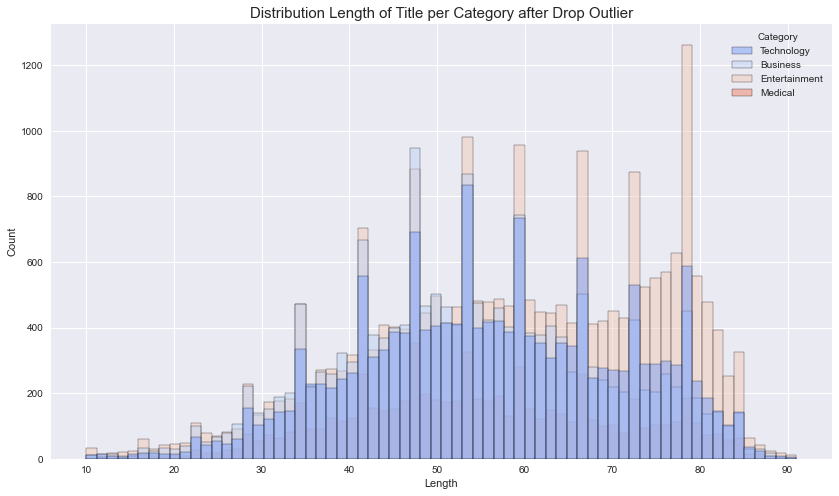

In [21]:
# Visualization Distribution Length of Title per Category after Drop Outlier
plt.figure(figsize=(14,8))
sns.histplot(dataset, x="Length", hue="Category",  palette = 'coolwarm')

plt.title('Distribution Length of Title per Category after Drop Outlier', fontsize=15)
plt.show()

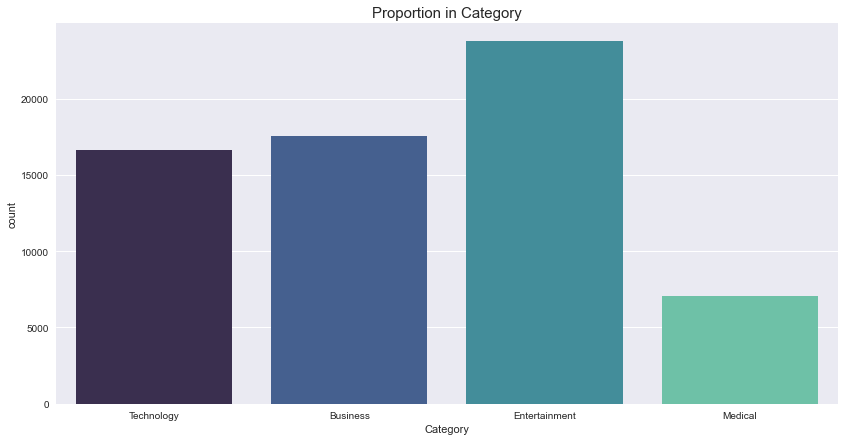

In [22]:
# Visualization Proportion Spam and Not Spam

plt.figure(figsize=(14,7))
sns.countplot(dataset['Category'],palette = 'mako')
plt.title('Proportion in Category', fontsize=15)
plt.show()

**It is assumed that the proportion of data does not occur imbalance**

In [23]:
# Make top word per category
dataset_tech = dataset[dataset['Category'] == 'Technology']
dataset_bu = dataset[dataset['Category'] == 'Business']
dataset_en = dataset[dataset['Category'] == 'Entertainment']
dataset_med = dataset[dataset['Category'] == 'Medical']


dataset_tech.reset_index(drop=True, inplace=True)
dataset_bu.reset_index(drop=True, inplace=True)
dataset_en.reset_index(drop=True, inplace=True)
dataset_med.reset_index(drop=True, inplace=True)

In [24]:
# Cleansing Format and Make CountWord in Dataset_Spam
for i in range(0, len(dataset_tech)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_tech['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_tech['Title'][i] = dataset_tech['Title'][i].replace(dataset_tech['Title'][i], cleaning)

Technology = ' '.join(dataset_tech['Title'])

In [25]:
# Cleansing Format and Make CountWord in Dataset_Spam
for i in range(0, len(dataset_bu)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_bu['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_bu['Title'][i] = dataset_bu['Title'][i].replace(dataset_bu['Title'][i], cleaning)

Business = ' '.join(dataset_bu['Title'])

In [26]:
# Cleansing Format and Make CountWord in Dataset_Spam
for i in range(0, len(dataset_en)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_en['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_en['Title'][i] = dataset_en['Title'][i].replace(dataset_en['Title'][i], cleaning)

Entertainment = ' '.join(dataset_en['Title'])

In [27]:
# Cleansing Format and Make CountWord in Dataset_Spam
for i in range(0, len(dataset_med)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_med['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_med['Title'][i] = dataset_med['Title'][i].replace(dataset_med['Title'][i], cleaning)

Medical = ' '.join(dataset_med['Title'])

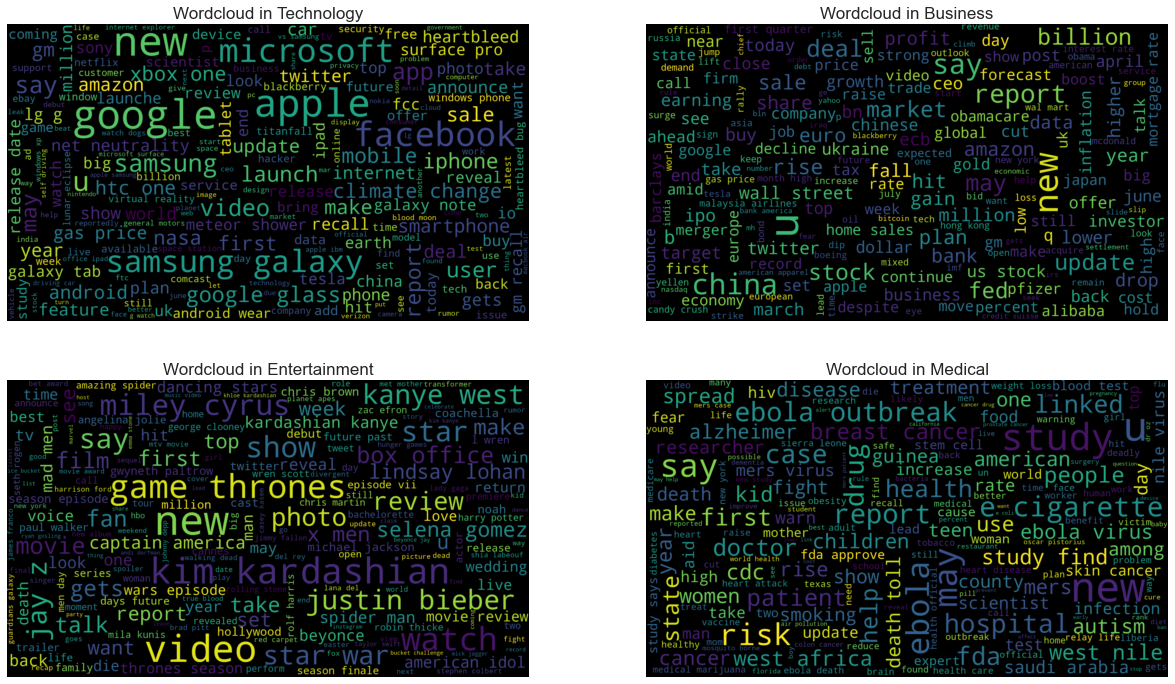

In [28]:
# Visualize Top Word in WordCloud for Spam Label
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords=STOPWORDS, background_color="black",
               max_font_size=150, random_state=42, width = 1900, height = 1080)
data = [Technology, Business, Entertainment, Medical]
title = ['Technology', 'Business', 'Entertainment', 'Medical']

plt.figure(figsize = (21, 12))
for index, cat in enumerate(data):
    plt.subplot(2, 2, index+1)
    wc.generate(str(cat))
    plt.imshow(wc, interpolation="bilinear")
    plt.title("Wordcloud in " + str(title[index]), fontsize = 17)
    plt.axis("off")
plt.show()

### Text Preprocessing (Data Cleansing)
At this stage we will carry out the following process:
1. Cleaning symbols in sentences
2. Make sentences lowercase (because it is case sensitive)
3. Tokenization process (break sentences into smaller elements, the process here breaks down to words only)
4. Remove common words in English (because the title are assumed only contain English words)
5. The word will use stemming and lemmatization processes to equate words that have different writings but have the same meaning
6. Combine all clean words into sentences and combine them into a list
7. From these words a vector will be created to calculate the frequency of each word per title per rows of data (the output will be a feature that can be processed in machine learning models)

In [29]:
# Import libraries for Text Processing
# NLTK is Natural Language Toolkit

#Stopwords
from nltk.corpus import stopwords

#Stemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
porstem = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

#Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
# Create Function to Cleansing format of text in dataset (with Stemming)
bow_stem = []
for i in range(0, len(dataset)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [porstem.stem(word) for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    bow_stem.append(cleaning)

In [31]:
# Create Function to Cleansing format of text in dataset (with Lemmatize)
bow_lem = []
for i in range(0, len(dataset)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset['Title'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [lemmatizer.lemmatize(word) for word in cleaning if not word in set(stopwords.words('english'))]
    cleaning = ' '.join(cleaning)
    bow_lem.append(cleaning)

In [32]:
# CountVectorizer to create matrix count word in text (Stemming Ouput)
from sklearn.feature_extraction.text import TfidfVectorizer
cvstem = TfidfVectorizer()
X_tfidfstem = cvstem.fit_transform(bow_stem).toarray()

In [33]:
# CountVectorizer to create matrix count word in text (Lemmatize Ouput)
from sklearn.feature_extraction.text import TfidfVectorizer
cvlem = TfidfVectorizer()
X_tfidflem = cvlem.fit_transform(bow_lem).toarray()

In [34]:
# Example of Countvectorizer
X_tfidfstem_df = pd.DataFrame(X_tfidfstem, columns = cvstem.get_feature_names())
X_tfidfstem_df.head()

,aa,aaa,aaaarrrrrghhh,aacr,aafa,aaic,aal,aaliyah,aap,aapl,...,zr,zsasz,zte,zucker,zuckerberg,zulia,zurich,zvyagintsev,zx,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Our Data is Clean and Ready to Consume to Model**

### Machine Learning Modelling
At this stage we will carry out the following process:
1. Splitting data into test and train data
2. Modeling processed data with Machine Learning models
3. Taking the best model based on the highest accuracy value

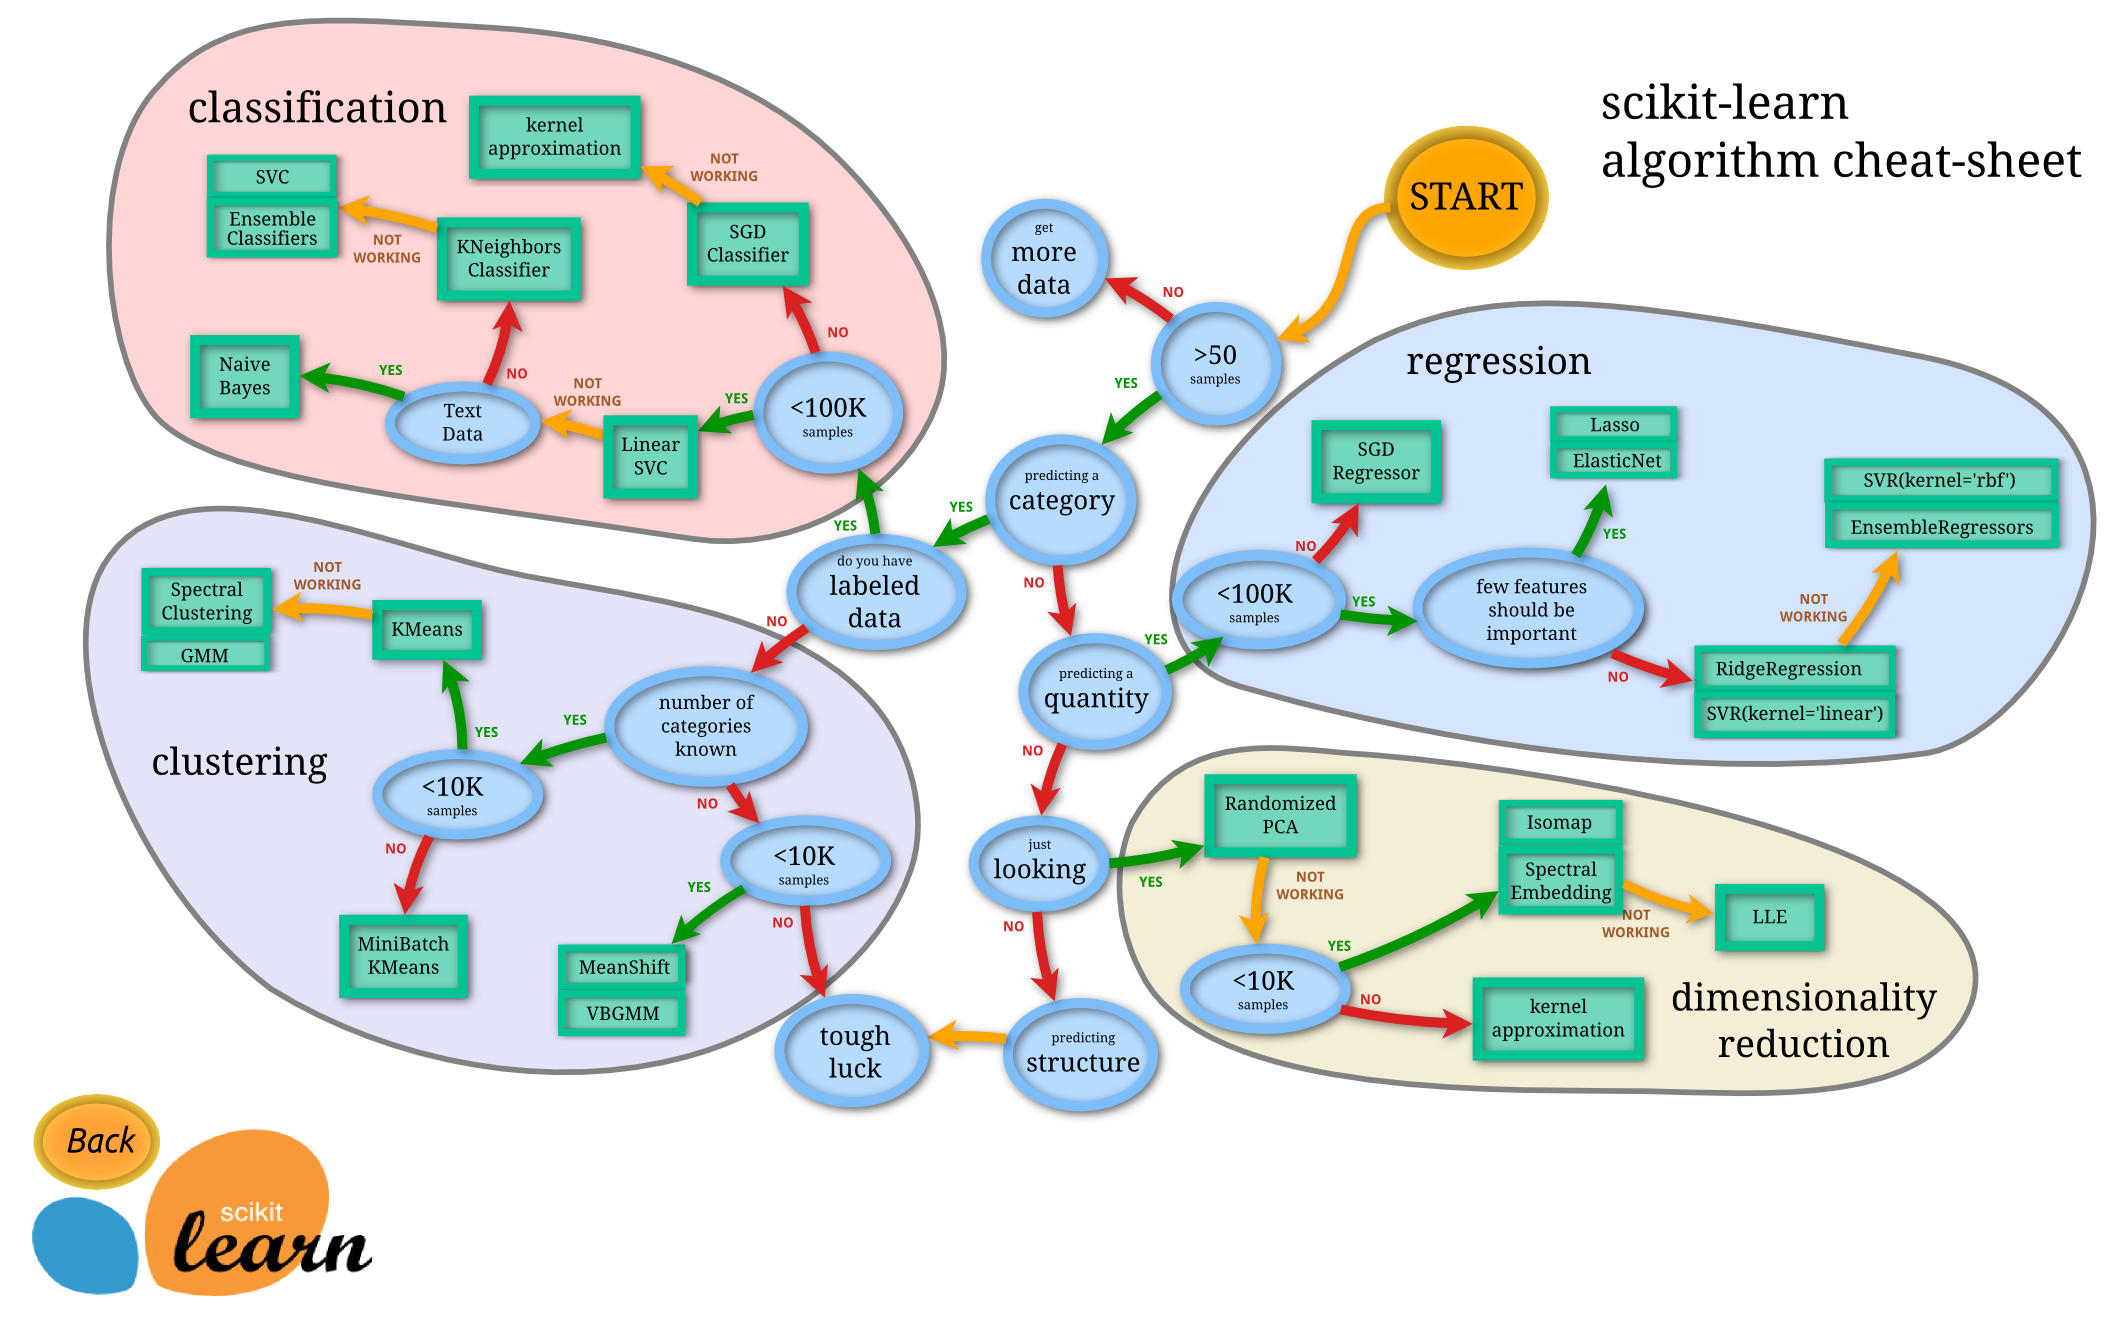

In [35]:
from IPython.display import Image
Image(r"C:\Users\aditc\Documents\Learning\NLP Project\Cheat-Sheet-Scikit-learn.png")

I use this **cheat sheet** as a guide for choosing the right machine learning algorithm, in this **scikit-learn cheat sheet** it is explained that the right method is the Naive Bayes algorithm for text processing.
So, I will use 3 models of naive bayes :
1. Multinomial Naive Bayes
2. Gaussian Naive Bayes
3. Bernoulli Naive Bayes

In [36]:
# Import Libraries of Model
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB #Multinomial Naive Bayes
from sklearn.naive_bayes import BernoulliNB #Bernoulli Naive Bayes

In [37]:
#Get Best Value From Stem Technique on Base Model Machine Learning
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()
y = dataset['Label'].values

stem_score = {}

#Split Data Train and Test for Vector Data Stem
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidfstem, y, test_size = 0.20, random_state = 0)

#GaussianNB
spam_GB = GB.fit(X_train, y_train)
y_pred_GB = spam_GB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelGB = accuracy_score(y_test, y_pred_GB)
stem_score['GaussianNB_stem'] = accuracy_spam_modelGB


#MultinomialNB
spam_MB = MB.fit(X_train, y_train)
y_pred_MB = spam_MB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelNB = accuracy_score(y_test, y_pred_MB)
stem_score['MultinomialNB_stem'] = accuracy_spam_modelNB


#BernoulliNB
spam_BB = BB.fit(X_train, y_train)
y_pred_BB = spam_BB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelBB = accuracy_score(y_test, y_pred_BB)
stem_score['BernoulliNB_stem'] = accuracy_spam_modelBB

In [38]:
#Get Best Value From Lemmatize Technique on Base Model Machine Learning
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()
y = dataset['Label'].values

lem_score = {}

#Split Data Train and Test for Vector Data Stem
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidfstem_df, y, test_size = 0.20, random_state = 0)

#GaussianNB
spam_GB = GB.fit(X_train, y_train)
y_pred_GB = spam_GB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelGB = accuracy_score(y_test, y_pred_GB)
lem_score['GaussianNB_lem'] = accuracy_spam_modelGB


#MultinomialNB
spam_MB = MB.fit(X_train, y_train)
y_pred_MB = spam_MB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelNB = accuracy_score(y_test, y_pred_MB)
lem_score['MultinomialNB_lem'] = accuracy_spam_modelNB


#BernoulliNB
spam_BB = BB.fit(X_train, y_train)
y_pred_BB = spam_BB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelBB = accuracy_score(y_test, y_pred_BB)
lem_score['BernoulliNB_lem'] = accuracy_spam_modelBB

In [39]:
#Best Score between Stemming and Lemmatize using Naive Bayes Model
max(max(stem_score.items()), max(lem_score.items()))

('MultinomialNB_stem', 0.9032481527093597)

The best model of the three models is **Multinomial Naive Bayes** by looking only at the accuracy value.

Hyper tuning process is not carried out (enough time is given but it is constrained because while working too)